In [111]:
pip install --user mdptoolbox-hiive

Note: you may need to restart the kernel to use updated packages.


In [6]:
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning, PolicyIterationModified
from hiive.mdptoolbox.example import forest
import gym
import numpy as np
import sys
import os
from numpy.random import choice
import pandas as pd
import matplotlib.pyplot as plt
import time as time
import random as random

In [7]:
P, R = forest(S=25, r1=10, r2=6, p=0.1)
print("R",R)
P_big, R_big = forest(S=1000, r1=10, r2=6, p=0.1)

R [[ 0.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [10.  6.]]


In [9]:
def policy_reward(P, R, policy, gamma):
    state_number = P.shape[-1]
    total_episodes = state_number * 100
    total_reward = 0
    
    for i in range(state_number):
        state_reward = 0
        for j in range(100):
            episode_reward = 0
            discount_rate = 1
            while True:
                
                action = policy[i]
                probs = P[action][i]
                candidates = list(range(len(P[action][i])))
                next_state =  choice(candidates, 1, p=probs)[0]
                
                reward = R[i][action] * discount_rate
                episode_reward += reward
                
                discount_rate *= gamma
                if next_state == 0:
                    break
            state_reward += episode_reward
        total_reward += state_reward
    return total_reward / total_episodes

In [3]:
def plot_value_gamma(P,R,gammas, title):
    iteration=[]
    time_used=[]
    policies=[]
    rewards=[]
    values=[]
    
    for each in gammas:
        v = ValueIteration(P, R, gamma=float(each), epsilon=1e-9, max_iter=int(1e15))
        v.run()
        iteration.append(v.iter)
        time_used.append(v.time)
        policies.append(v.policy)
        rewards.append(policy_reward(P, R, v.policy, float(each)))
   
    plt.figure()
    plt.plot(gammas, iteration)
    plt.xlabel('Discount Rate')
    plt.ylabel('Iteration Number')
    title1=title+" Iteraion Number"
    plt.title(title1)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(gammas, time_used, 'bx-')
    plt.xlabel('Discount Rate')
    plt.ylabel('Time Used')
    title2=title+" Time Used"
    plt.title(title2)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(gammas, rewards, 'bx-')
    plt.xlabel('Discount Rate')
    plt.ylabel('Reward')
    title3=title+" Reward"
    plt.title(title3)
    plt.show()
    plt.close()
    
    print("Policies", policies)

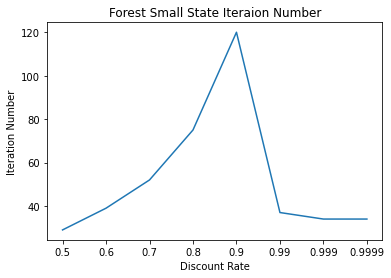

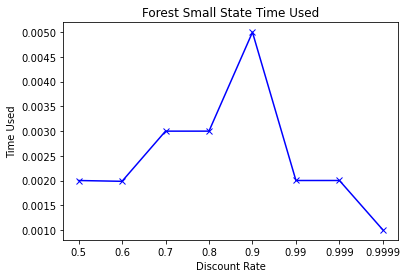

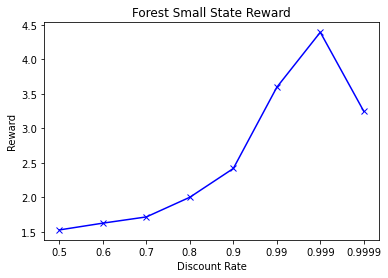

Policies [(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0), (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0), (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0), (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)]


In [21]:
plot_value_gamma(P,R,["0.5","0.6","0.7","0.8","0.9","0.99","0.999","0.9999"],"Forest Small State")

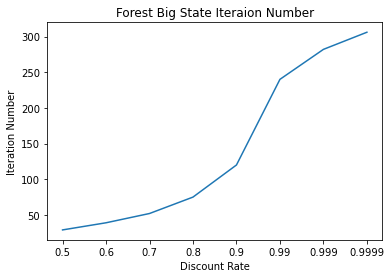

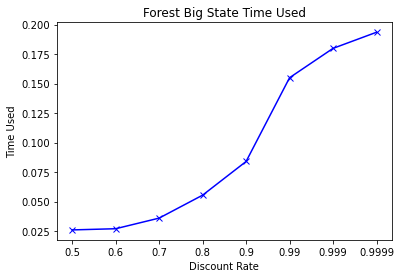

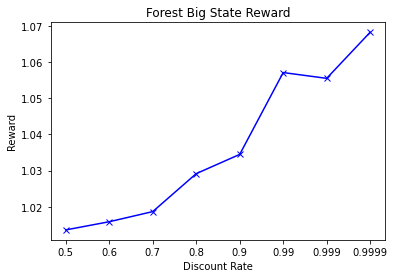

Policies [(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
plot_value_gamma(P_big,R_big,["0.5","0.6","0.7","0.8","0.9","0.99","0.999","0.9999"],"Forest Big State")

In [510]:
def plot_value_epsilon(P,R,epsilons, title):
    iteration=[]
    time_used=[]
    policies=[]
    rewards=[]
    
    for each in epsilons:
        
        v = ValueIteration(P, R, gamma=0.999, epsilon=10**int(each), max_iter=int(1e15))
        v.run()
        iteration.append(v.iter)
        time_used.append(v.time)
        policies.append(v.policy)
        rewards.append(policy_reward(P, R, v.policy, 0.999))
        
    
    plt.figure()
    plt.plot(epsilons, iteration)
    plt.xlabel('Epsilon')
    plt.ylabel('Iteration Number')
    title1=title+" Iteraion Number"
    plt.title(title1)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(epsilons, time_used, 'bx-')
    plt.xlabel('Epsilon')
    plt.ylabel('Time Used')
    title2=title+" Time Used"
    plt.title(title2)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(epsilons, rewards, 'bx-')
    plt.xlabel('Epsilon')
    plt.ylabel('Rewards')
    title3=title+" Rewards"
    plt.title(title3)
    plt.show()
    plt.close()
    
    print("Policies", policies)

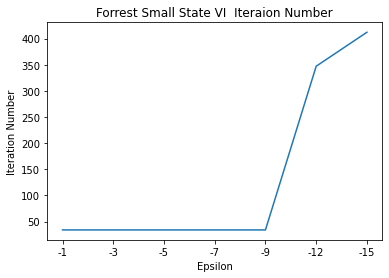

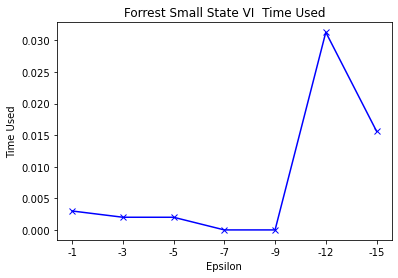

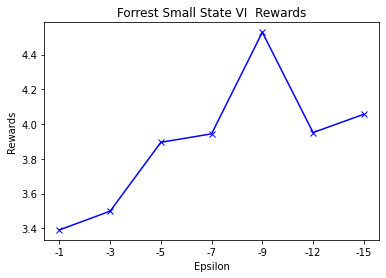

Policies [(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)]


In [511]:
plot_value_epsilon(P,R,["-1","-3","-5","-7","-9","-12", "-15"],"Forrest Small State VI ")

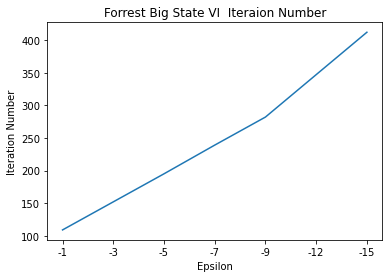

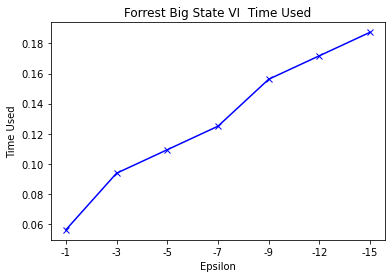

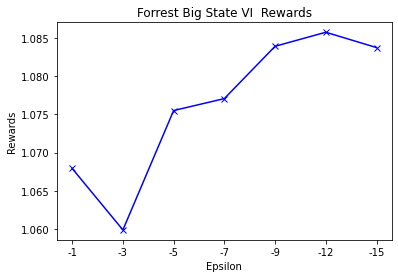

Policies [(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [512]:
plot_value_epsilon(P_big,R_big,["-1","-3","-5","-7","-9","-12", "-15"],"Forrest Big State VI ")

In [12]:
def plot_policy_gamma(P,R,gammas, title):
    iteration=[]
    time_used=[]
    policies=[]
    rewards=[]
    values=[]
    
    for each in gammas:
        p = PolicyIteration(P, R, gamma=float(each), max_iter=int(1e15))
        p.run()
        iteration.append(p.iter)
        time_used.append(p.time)
        policies.append(p.policy)
        rewards.append(policy_reward(P, R, p.policy, float(each)))
   
    plt.figure()
    plt.plot(gammas, iteration)
    plt.xlabel('Discount Rate')
    plt.ylabel('Iteration Number')
    title1=title+" Iteraion Number"
    plt.title(title1)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(gammas, time_used, 'bx-')
    plt.xlabel('Discount Rate')
    plt.ylabel('Time Used')
    title2=title+" Time Used"
    plt.title(title2)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(gammas, rewards, 'bx-')
    plt.xlabel('Discount Rate')
    plt.ylabel('Reward')
    title3=title+" Reward"
    plt.title(title3)
    plt.show()
    plt.close()
    
    print("Policies", policies)

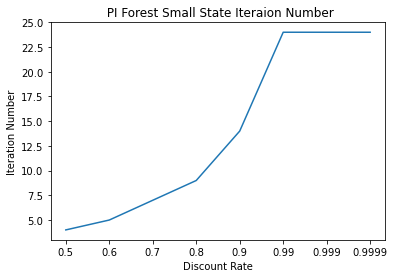

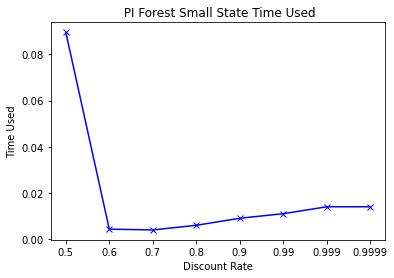

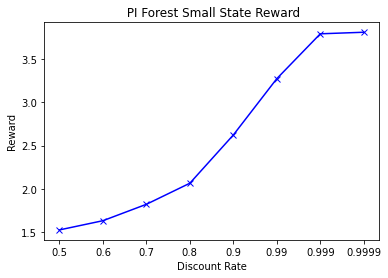

Policies [(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0), (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0), (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0), (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)]


In [13]:
plot_policy_gamma(P,R,["0.5","0.6","0.7","0.8","0.9","0.99","0.999","0.9999"]," PI Forest Small State")

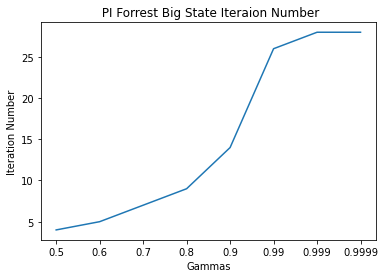

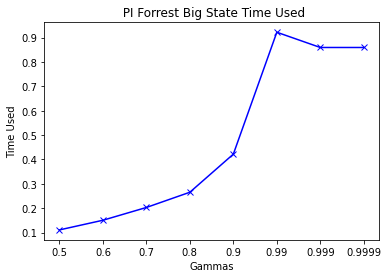

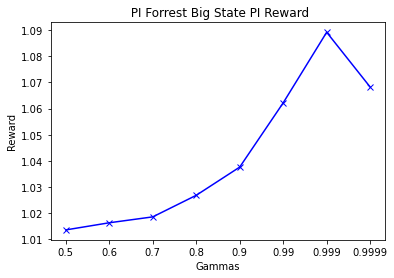

Policies [(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [520]:
plot_policy_gamma(P_big,R_big,["0.5","0.6","0.7","0.8","0.9","0.99","0.999","0.9999"]," PI Forrest Big State")

In [528]:
def plot_Q_gamma(P,R,gammas, title):
    iteration=[]
    time_used=[]
    policies=[]
    rewards=[]
    values=[]
    
    for each in gammas:
        time_started=time.time()
        q = QLearning(P, R, gamma=float(each), n_iter=20000000)
        
        q.run()
        timed=time.time()-time_started
        time_used.append(timed)
        policies.append(q.policy)
        rewards.append(policy_reward(P, R, q.policy, float(each)))
   
    plt.figure()
    plt.plot(gammas, time_used, 'bx-')
    plt.xlabel('Gammas')
    plt.ylabel('Time Used')
    title2=title+" Time Used"
    plt.title(title2)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(gammas, rewards, 'bx-')
    plt.xlabel('Gammas')
    plt.ylabel('Reward')
    title3=title+" Reward"
    plt.title(title3)
    plt.show()
    plt.close()
    
    print("Policies", policies)

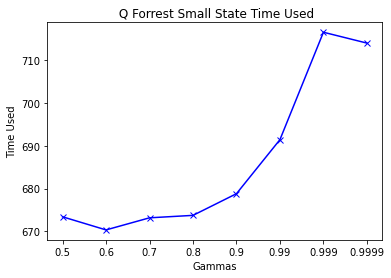

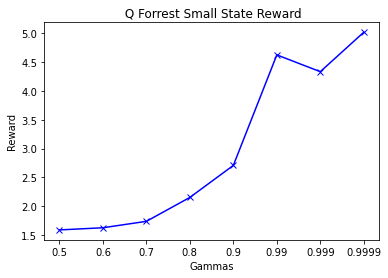

Policies [(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0), (0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0), (0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0), (0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0), (0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0), (0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0), (0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0), (0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0)]


In [529]:
plot_Q_gamma(P,R,["0.5","0.6","0.7","0.8","0.9","0.99","0.999","0.9999"]," Q Forrest Small State")

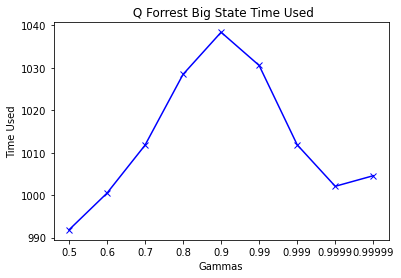

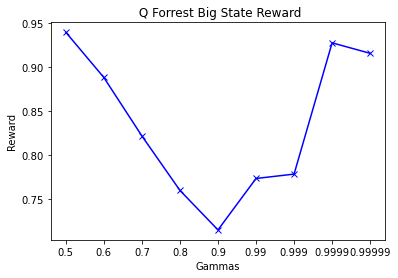

Policies [(0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [559]:
plot_Q_gamma(P_big,R_big,["0.5","0.6","0.7","0.8","0.9","0.99","0.999","0.9999","0.99999" ]," Q Forrest Big State")

In [555]:
def plot_Q_iteration(P,R, iterations,title):
    iteration=[]
    time_used=[]
    policies=[]
    
    rewards=[]
    
    for each in iterations:
        time_started=time.time()
        q = QLearning(P, R, gamma=0.99, n_iter=float(each))
        
        q.run()
        time_spent=time.time()-time_started
        policies.append(q.policy)
        rewards.append(policy_reward(P, R, q.policy, 0.99))
        time_used.append(time_spent)
        
    plt.figure()
    plt.plot(iterations, rewards, 'bx-')
    plt.xlabel('Iteration Number')
    plt.ylabel('Reward')
    title3=title+" Iteration Number"
    plt.title(title3)
    plt.show()
    plt.close()
    
    
    
    plt.figure()
    plt.plot(iterations, time_used, 'bx-')
    plt.xlabel('Iteration Number')
    plt.ylabel('Time')
    title4=title+" Time Spent"
    plt.title(title4)
    plt.show()
    plt.close()
    
    
    
    
    
    print("Policies", policies)

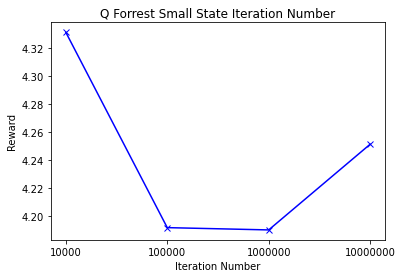

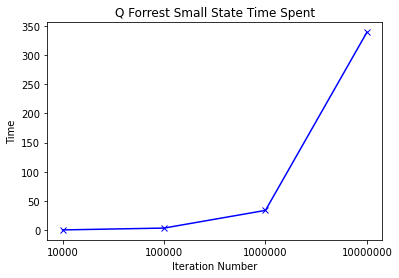

Policies [(0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0), (0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0), (0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0), (0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0)]


In [557]:
plot_Q_iteration(P,R,["10000", "100000", "1000000", "10000000"], "Q Forrest Small State")




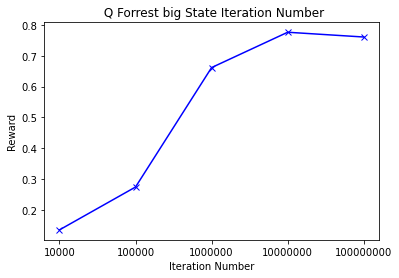

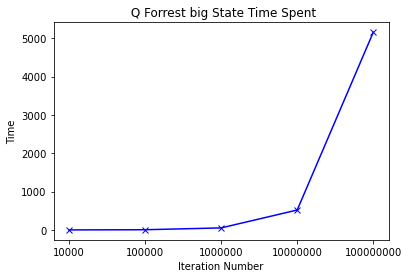

Policies [(0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [558]:
plot_Q_iteration(P_big,R_big,["10000", "100000", "1000000", "10000
                              000", "100000000"]," Q Forrest big State")

In [37]:
def value_iteration_frozen_lake(env, discount, epsilon):
    
    start_time=time.time()
    
    states_number = env.observation_space.n
    action_number = env.action_space.n
    policy = np.zeros((1, states_number))
    value_table = np.zeros((1, states_number))
    old_value_table = value_table.copy()
    episode = 0
    max_change=1
    rewards=[]
    
    while max_change > epsilon:
        episode += 1
        total_reward=0
        for state in range(states_number):
            assigned_value = 0
            for action in range(action_number):
                        
                total_value = 0
                for prob, new_state, reward, done in env.P[state][action]:
                    
                    new_state_value = old_value_table[0][new_state]
                    value = 0
                    if done:
                        value = reward 
                    else:
                        value = reward + discount*new_state_value
                    total_value += value*prob 
                    total_reward=total_reward+reward
                    #print(total_reward)
                if  total_value> assigned_value:
                    assigned_value = total_value
                    policy[0][state] = action
                    value_table[0][state] = assigned_value
        #print(total_reward)
        rewards.append(total_reward)
        changes = np.abs(value_table - old_value_table)
        max_change = np.max(changes)
        old_value_table = value_table.copy()
        
    #print(rewards)
    time_spent = time.time()-start_time
    
    return policy[0], episode, time_spent, value_table

In [34]:
def plot_lake_value_gamma(env,gammas, title):
    iteration=[]
    time_used=[]
    policies=[]
    rewards=[]
    values=[]
    
    for each in gammas:
        policy,episode, time_spent, reward = value_iteration_frozen_lake(env, float(each), 1e-9)
        #print(np.mean(reward))
        iteration.append(episode)
        time_used.append(time_spent)
        policies.append(policy)
        rewards.append(np.mean(reward))
   
    plt.figure()
    plt.plot(gammas, iteration)
    plt.xlabel('Discount Rate')
    plt.ylabel('Iteration Number')
    title1=title+" Iteraion Number"
    plt.title(title1)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(gammas, time_used, 'bx-')
    plt.xlabel('Discount Rate')
    plt.ylabel('Time Used')
    title2=title+" Time Used"
    plt.title(title2)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(gammas, rewards, 'bx-')
    plt.xlabel('Discount Rate')
    plt.ylabel('Reward')
    title3=title+" Reward"
    plt.title(title3)
    plt.show()
    plt.close()
    
    print("Policies", policies)

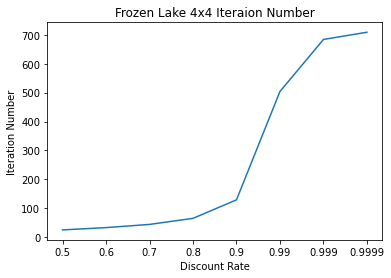

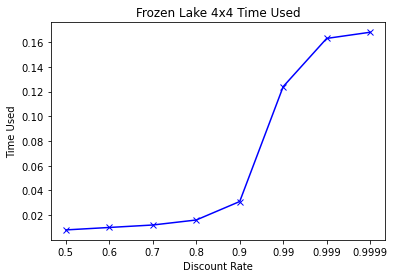

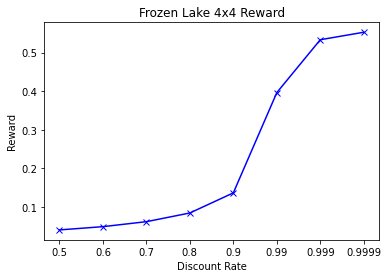

Policies [array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]), array([2., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]), array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]), array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]), array([0., 3., 0., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]), array([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]), array([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]), array([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])]


In [38]:
env = gym.make("FrozenLake-v0")

plot_lake_value_gamma(env,["0.5","0.6","0.7","0.8","0.9", "0.99", "0.999", "0.9999"], "Frozen Lake 4x4")


SFFHFFFFFFFFFFFFFFFFFFFFFFFFFF
HFHFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
FFFFFFFFFFFFFFFFFFFFFFFFFHHHFH
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFHFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFHFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
FFFHFFFFFFFFFFFFFFFFFFFFFFFFFF
HFHFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFHFFFFF
FFFFFFFFFFFFFFFFFFFFFFFFFHHHFH
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFHFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFHFFFFFFFF
HFFFFFFFFFFFFFFFFHFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFHFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFG


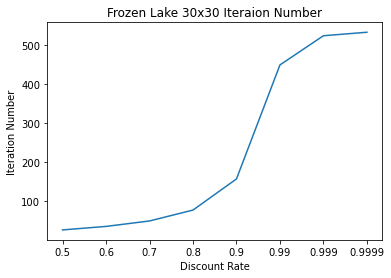

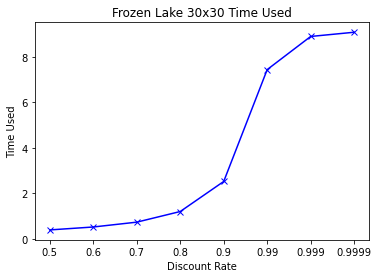

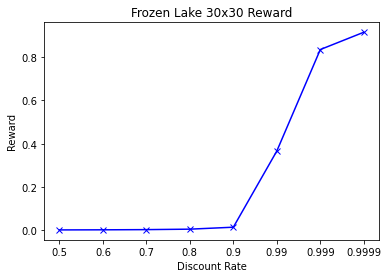

Policies [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 

In [60]:
custom_map = [
    'SFFHFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFHFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'FFFFFFFFFFFFFFFFFFFFFFFFFHHHFH',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFHFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFHFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'FFFHFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFHFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFHFFFFF',
    'FFFFFFFFFFFFFFFFFFFFFFFFFHHHFH',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFHFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFHFFFFFFFF',
    'HFFFFFFFFFFFFFFFFHFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFHFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFG',
]

env = gym.make('FrozenLake-v0', desc=custom_map)
env.reset()
env.render()
plot_lake_value_gamma(env,["0.5","0.6","0.7","0.8","0.9", "0.99", "0.999", "0.9999"], "Frozen Lake 30x30")

In [57]:
def policy_iteration_frozen_lake(env, gamma):
    
    start_time=time.time()
    
    state_number = env.observation_space.n
    action_number = env.action_space.n
    P = np.zeros((state_number, action_number, state_number))  # transition probability
    R = np.zeros((state_number, action_number, state_number))  # rewards
    rewards=[]
    
    value_table = np.zeros((1, state_number))
    old_value_table = value_table.copy()
    episode = 0
    max_change=1
    
    for state in range(state_number):
            
            for action in range(action_number):
                for prob, new_state, reward, done in env.P[state][action]:
                    P[state][action][new_state]=prob
                    R[state][action][new_state]=reward
                    
    
    V = np.zeros(state_number)
    policy = [0 for s in range(state_number)]
    is_value_changed = True
    iteration = 0
    while is_value_changed:
        is_value_changed = False
        iteration =iteration+ 1
      
        for s in range(state_number):
            V[s] = sum([P[s,policy[s],s1] * (R[s,policy[s],s1] + gamma*V[s1]) for s1 in range(state_number)])
            r=sum([P[s,policy[s],s1] * (R[s,policy[s],s1]) for s1 in range(state_number)])
         

        for s in range(state_number):
            q_best = V[s]
        
            for a in range(action_number):
                q_sa = sum([P[s, a, s1] * (R[s, a, s1] + gamma * V[s1]) for s1 in range(state_number)])
                if q_sa > q_best:
                    
                    policy[s] = a
                    q_best = q_sa
                    is_value_changed = True
    
   
    total_reward=0
    for i in range(100):
        env.reset()
        for action in policy:
            
            current_state, reward, done, info = env.step(action)
            
            total_reward=total_reward+reward
            if done: 
                break
    reward=total_reward/100*len(policy)
               
            
        
        
    time_spent=time.time()-start_time

    return V, iteration, time_spent,policy
    

In [58]:
env = gym.make("FrozenLake-v0")
env.reset()
env.render()
value,iterations, time_spent, policy=policy_iteration_frozen_lake(env,0.9)
print(value)


SFFF
FHFH
FFFH
HFFG
[0.06280484 0.05806955 0.07269079 0.03115319 0.08847507 0.
 0.11154228 0.         0.14363699 0.24667792 0.29911682 0.
 0.         0.37950591 0.63883586 0.        ]


In [45]:
    
def plot_policy_lake_gamma(env,gammas, title):
    iteration=[]
    time_used=[]
    policies=[]
    rewards=[]
    values=[]
    
    for each in gammas:
        r,i,t,p = policy_iteration_frozen_lake(env, gamma=float(each))
            
        iteration.append(i)
        time_used.append(t)
        policies.append(p)
        rewards.append(np.mean(r))
    
    print(iteration)
    print(time_used)
    print(policies)
    print(values)
    
    plt.figure()
    plt.plot(gammas, iteration)
    plt.xlabel('Discount Rate')
    plt.ylabel('Iteration Number')
    title1=title+" Iteraion Number"
    plt.title(title1)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(gammas, time_used, 'bx-')
    plt.xlabel('Discount Rate')
    plt.ylabel('Time Used')
    title2=title+" Time Used"
    plt.title(title2)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(gammas, rewards, 'bx-')
    plt.xlabel('Discount Rate')
    plt.ylabel('Reward')
    title3=title+" PI Reward"
    plt.title(title3)
    plt.show()
    plt.close()
    
    print("Policies", policies)


SFFF
FHFH
FFFH
HFFG
[43, 53, 70, 98, 164, 429, 513, 534]
[0.07799935340881348, 0.09499812126159668, 0.12900114059448242, 0.17403149604797363, 0.277998685836792, 0.6919710636138916, 0.8249988555908203, 0.8570303916931152]
[[1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]]
[]


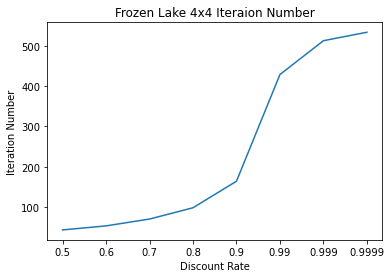

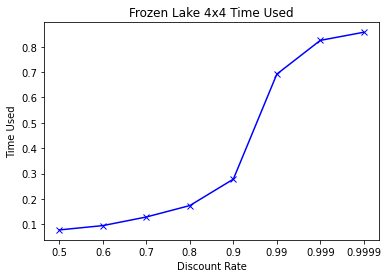

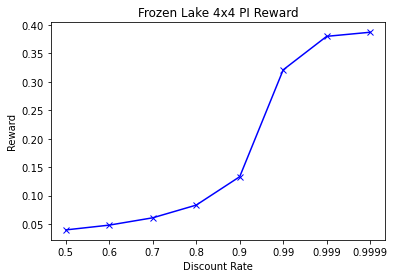

Policies [[1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], [1, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]]


In [59]:
env = gym.make("FrozenLake-v0")
env.reset()
env.render()
plot_policy_lake_gamma(env,["0.5","0.6","0.7","0.8","0.9", "0.99", "0.999", "0.9999"],"Frozen Lake 4x4")



SFFHFFFFFFFFFFFFFFFFFFFFFFFFFF
HFHFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
FFFFFFFFFFFFFFFFFFFFFFFFFHHHFH
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFHFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFHFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
FFFHFFFFFFFFFFFFFFFFFFFFFFFFFF
HFHFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFHFFFFF
FFFFFFFFFFFFFFFFFFFFFFFFFHHHFH
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFHFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFHFFFFFFFF
HFFFFFFFFFFFFFFFFHFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFHFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFG
[102, 113, 131, 161, 219, 398, 441, 447]
[437.7329981327057, 529.1810

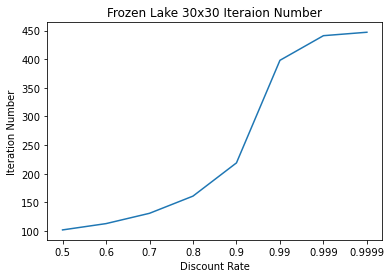

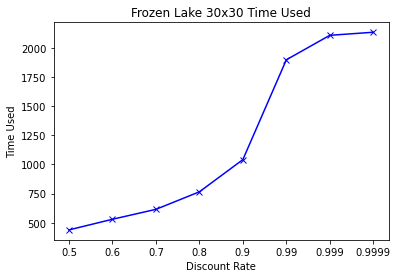

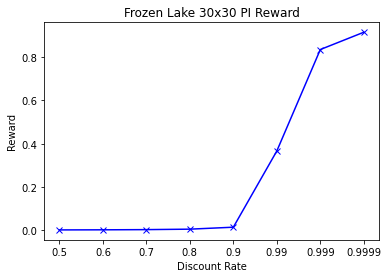

Policies [[1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 2, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [61]:
custom_map = [
    'SFFHFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFHFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'FFFFFFFFFFFFFFFFFFFFFFFFFHHHFH',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFHFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFHFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'FFFHFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFHFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFHFFFFF',
    'FFFFFFFFFFFFFFFFFFFFFFFFFHHHFH',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFHFFFF',
    
    
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFHFFFFFFFF',
    'HFFFFFFFFFFFFFFFFHFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFHFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFG',
]



env = gym.make('FrozenLake-v0', desc=custom_map)
env.reset()
env.render()

plot_policy_lake_gamma(env,["0.5","0.6","0.7","0.8","0.9", "0.99", "0.999", "0.9999"], "Frozen Lake 30x30")

In [64]:
def frozen_lake_Q (env,lamda,gamma,epsilon_max,epsilon_min,decay_rate,total_episodes):
    action_size = env.action_space.n
    state_size = env.observation_space.n
    policies=[]
   
    qtable = np.zeros((state_size, action_size))
   
    max_steps = 99               
    epsilon=1
    
    rewards = []
    time_start=time.time()

    for episode in range(total_episodes):
    
        state = env.reset()
        
        step = 0
        done = False
        total_rewards = 0
    
        while True:
        
            exp_exp_tradeoff = random.uniform(0, 1)
        
       
            if exp_exp_tradeoff > epsilon:
                b = qtable[state, :]
                action = np.random.choice(np.where(b == b.max())[0])
           
            else:
                action = env.action_space.sample()
           
            new_state, reward, done, info = env.step(action)
            total_rewards += reward
       
            if not done:
                qtable[state, action] = qtable[state, action] + lamda*(reward + gamma*np.max(qtable[new_state, :]) - qtable[state, action])
            else:
                qtable[state, action] = qtable[state,action] + lamda*(reward - qtable[state,action])
            
        
        
            state = new_state
        
        
            if done: 
                break
        current_state=0
        policy=[]
        state = env.reset()
        for s in range(state_size):
            action=np.argmax(qtable[current_state,:])
            policy.append(action)
            current_state, reward, done, info = env.step(action)
        policies.append(policy)   
        epsilon = max(epsilon_max -  decay_rate * episode, epsilon_min)
        
        rewards.append(total_rewards)
    
    time_spent=time.time()-time_start
    return rewards, time_spent, policies
    

In [9]:
def lake_q_plot(env,lamda,gamma,epsilon_max,epsilon_min,decay_rate,total_episode): 
    rewards=[]
    time_used=[]
    reward,time_spent, policy=frozen_lake_Q (env,lamda,gamma,epsilon_max,epsilon_min,decay_rate,total_episode)
    
    reward=np.array(reward)
    #print (reward)
    #print(reward[:50])
    for i in range(1000,total_episode,1000):
        accumulate_reward_average=np.mean(reward[i-1000:i])
        rewards.append(accumulate_reward_average)
       
    #print(rewards)
    plt.figure()
    plt.plot(range(1000,total_episode,1000), rewards)
    plt.xscale("log")
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    title1="4x4 frozen Lake Q Reward vs episode"
    plt.title(title1)
    plt.show()
    plt.close()
    
    print(policy[-10:])
    print(time_spent)

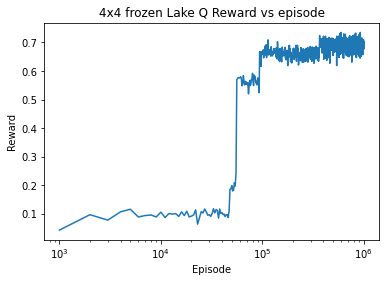

[[0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 1, 2, 1, 2, 1], [0, 0, 0, 3, 3, 1, 2, 1, 1, 2, 1, 3, 3, 0, 0, 3], [0, 0, 0, 0, 3, 0, 3, 1, 3, 1, 2, 1, 1, 1, 2, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0], [0, 0, 0, 3, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1], [0, 0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [628]:
env = gym.make("FrozenLake-v0")


lake_q_plot (env,0.01,0.999,1,0.01,0.001,1000000)

In [ ]:
custom_map = [
    'SFFHFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFHFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'FFFFFFFFFFFFFFFFFFFFFFFFFHHHFH',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFHFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFHFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'FFFHFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFHFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFHFFFFF',
    'FFFFFFFFFFFFFFFFFFFFFFFFFHHHFH',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFHFFFF',
    
    
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFHFFFFFFFF',
    'HFFFFFFFFFFFFFFFFHFFFFFFFFFFFF',
    'HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFHFFFFFFFFFFFFFFF',
    'HFFFFFFFFFFFFFFFFFFFFFFFFFFFFG',]

env = gym.make('FrozenLake-v0', desc=custom_map)
env.reset()
env.render()

lake_q_plot (env,0.01,0.999,1,0.01,0.001,1000000)


SFFHFFFFFFFFFFFFFFFFFFFFFFFFFF
HFHFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
FFFFFFFFFFFFFFFFFFFFFFFFFHHHFH
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFHFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFHFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
FFFHFFFFFFFFFFFFFFFFFFFFFFFFFF
HFHFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFHFFFFF
FFFFFFFFFFFFFFFFFFFFFFFFFHHHFH
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFHFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFHFFFFFFFF
HFFFFFFFFFFFFFFFFHFFFFFFFFFFFF
HFFFHFFFFFFFFFFFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFHFFFFFFFFFFFFFFF
HFFFFFFFFFFFFFFFFFFFFFFFFFFFFG


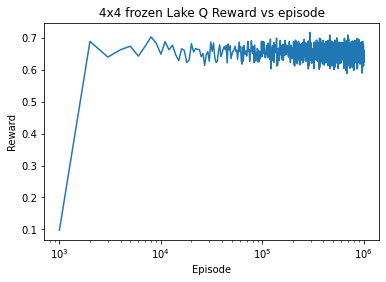

[[0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 2, 1, 1], [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 3, 0, 3], [0, 0, 3, 3, 3, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 2, 2, 1, 0, 0], [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [629]:
env = gym.make("FrozenLake-v0")

lake_q_plot (env,0.1,0.999,1,0.01,0.001,1000000)

In [630]:
def lake_q_episode_plot(env,lamda,gamma,epsilon_max,epsilon_min,decay_rate,iterations): 
    rewards=[]
    time_used=[]
    policies=[]
    for i in iterations:
        reward,time_spent,policy=frozen_lake_Q (env,lamda,gamma,epsilon_max,epsilon_min,decay_rate,int(i))
        rewards.append(np.mean(reward[-1000:]))
        time_used.append(time_spent)
        policies.append(policy[-10:])
    print(rewards)
    plt.figure()
    plt.plot(iterations, rewards,'bx-')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    title1="4x4 frozen Lake Q Reward vs episode"
    plt.title(title1)
    plt.show()
    plt.close()
    
      
    plt.figure()
    plt.plot(iterations, time_used,'bx-')
    plt.xlabel('Episode')
    plt.ylabel('Time Spent')
    title1="4x4 frozen Lake Q Time vs episode"
    plt.title(title1)
    plt.show()
    plt.close()
    
    print(policies)


SFFF
FHFH
FFFH
HFFG
[0.034, 0.079, 0.185, 0.682, 0.701]


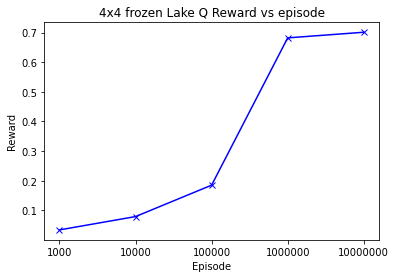

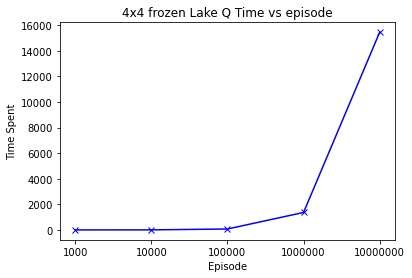

[[[1, 1, 1, 1, 2, 1, 1, 1, 3, 3, 1, 2, 1, 1, 1, 2], [1, 1, 1, 3, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0], [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0], [1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 3, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2], [1, 1, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[2, 1, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 1, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0], [2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [635]:
env = gym.make("FrozenLake-v0")
env.reset()

env.render()
lake_q_episode_plot (env,0.01,0.999,1,0.01,0.001,["1000","10000","100000","1000000","10000000"])



In [636]:
def lake_q_alpha_plot(env,learning_rate,gamma, epsilon_max,epsilon_min,decay_rate): 
    rewards=[]
    time_used=[]
    policies=[]
    for i in learning_rate:
        reward,time_spent, policy=frozen_lake_Q (env,float(i),gamma,epsilon_max,epsilon_min,decay_rate,1000000)
        rewards.append(np.mean(reward[-1000:]))
        time_used.append(time_spent)
        policies.append(policy[-10:])
    print(rewards)
    plt.figure()
    plt.plot(learning_rate, rewards,'bx-')
    plt.xlabel('Learning Rate')
    plt.ylabel('Reward')
    title1="4x4 frozen Lake Q Reward vs Learning Rate"
    plt.title(title1)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(learning_rate, time_used,'bx-')
    plt.xlabel('Learning Rate')
    plt.ylabel('Time Spent')
    title2="4x4 frozen Lake Q Time Spent vs Learning Rate"
    plt.title(title2)
    plt.show()
    plt.close()
    
    print(policies)


SFFF
FHFH
FFFH
HFFG
[0.652, 0.688, 0.401, 0.168, 0.028, 0.047]


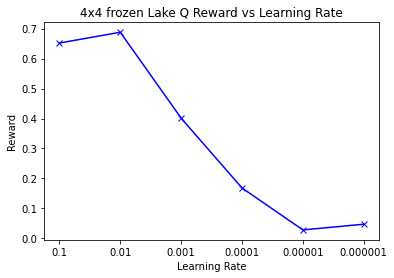

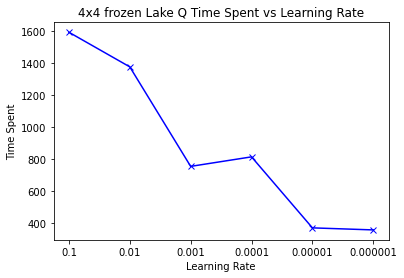

[[[0, 0, 0, 3, 1, 2, 2, 1, 3, 1, 3, 0, 0, 0, 0, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 1, 2, 1, 2], [0, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0], [0, 0, 0, 3, 0, 3, 1, 0, 0, 3, 3, 3, 3, 3, 3, 3], [0, 0, 0, 3, 1, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]], [[0, 0, 0, 0, 3, 1, 3, 1, 2, 2, 1, 2, 2, 1, 2, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 3, 0], [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 3, 3, 1, 0, 1, 2, 1, 2, 1, 0, 0], [0, 0, 3, 0, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 1, 3, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 3, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 

In [637]:
env = gym.make("FrozenLake-v0")
env.reset()
env.render()
lake_q_alpha_plot (env,["0.1","0.01", "0.001", "0.0001", "0.00001", "0.000001"],0.999,1,0.01,0.001)


In [62]:
def lake_q_gama_plot(env,learning_rate,gamma, epsilon_max,epsilon_min,decay_rate): 
    rewards=[]
    time_used=[]
    policies=[]
    for i in gamma:
        reward,time_spent, policy=frozen_lake_Q (env,learning_rate,float(i),epsilon_max,epsilon_min,decay_rate,1000000)
        rewards.append(np.mean(reward[-1000:]))
        time_used.append(time_spent)
        policies.append(policy[-10
                               :])
    print(rewards)
    plt.figure()
    plt.plot(gamma, rewards,'bx-')
    plt.xlabel('Discount Rate')
    plt.ylabel('Reward')
    title1="4x4 frozen Lake Q Reward vs Discount Rate"
    plt.title(title1)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(gamma, time_used,'bx-')
    plt.xlabel('Discount Rate')
    plt.ylabel('Time Spent')
    title2="4x4 frozen Lake Q Time Spent vs Discount Rate"
    plt.title(title2)
    plt.show()
    
    
    plt.close()
    
    print(policies)


SFFF
FHFH
FFFH
HFFG
[0.169, 0.374, 0.485, 0.481, 0.698, 0.692, 0.689, 0.691]


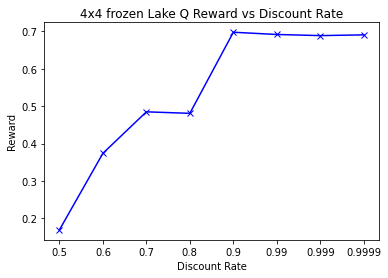

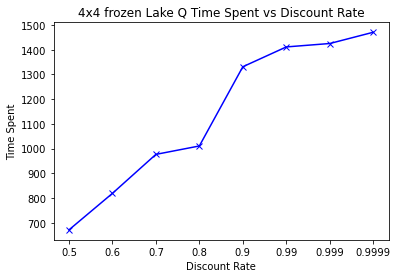

[[[1, 3, 0, 3, 3, 0, 3, 0, 3, 1, 3, 1, 3, 3, 1, 3], [1, 1, 0, 0, 1, 0, 1, 3, 3, 0, 3, 3, 0, 0, 0, 0], [1, 3, 3, 1, 1, 1, 3, 0, 3, 0, 0, 0, 1, 1, 1, 0], [1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 3, 3, 0, 3, 1, 3, 0, 3, 3, 3, 3, 0, 3, 3, 1], [1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 0, 1, 3, 0], [1, 1, 0, 1, 0, 1, 1, 3, 0, 0, 3, 0, 0, 0, 3, 0], [1, 1, 3, 0, 3, 0, 3, 3, 3, 1, 1, 0, 0, 0, 1, 3], [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[1, 3, 1, 0, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 3, 3], [1, 0, 1, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2], [1, 0, 1, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3], [1, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0], [1, 1, 1, 0, 1, 3, 3, 2, 2, 2, 2, 0, 0, 0, 0, 0], [1, 3, 3, 2, 2, 2, 1, 1, 3, 0, 0, 1, 0, 1, 3, 3], [1, 1, 1, 3, 3, 1, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0], [1, 1, 1, 3, 1, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 3, 1, 0, 0, 1, 1], [1, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 0, 0, 

In [65]:
env = gym.make("FrozenLake-v0")
env.reset()
env.render()
lake_q_gama_plot (env,0.01,["0.5","0.6","0.7","0.8","0.9","0.99","0.999","0.9999"],1,0.01,0.001)




In [642]:
def lake_q_decay_plot(env,learning_rate,gamma, epsilon_max,epsilon_min,decay_rate): 
    rewards=[]
    time_used=[]
    policies=[]
    for i in decay_rate:
        reward,time_spent, policy=frozen_lake_Q (env,learning_rate,gamma,epsilon_max,epsilon_min,float(i),1000000)
        rewards.append(np.mean(reward[-1000:]))
        time_used.append(time_spent)
        policies.append(policy[-10:])
    print(rewards)
    plt.figure()
    plt.plot(decay_rate, rewards,'bx-')
    plt.xlabel('Decay Rate')
    plt.ylabel('Reward')
    title1="4x4 frozen Lake Q Reward vs Decay Rate"
    plt.title(title1)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(decay_rate, time_used,'bx-')
    plt.xlabel('Decay Rate')
    plt.ylabel('Time Spent')
    title2="4x4 frozen Lake Q Time Spent vs Decay Rate"
    plt.title(title2)
    plt.show()
    
    
    plt.close()
    
    print(policies)


SFFF
FHFH
FFFH
HFFG
[0.69, 0.68, 0.694, 0.691, 0.7]


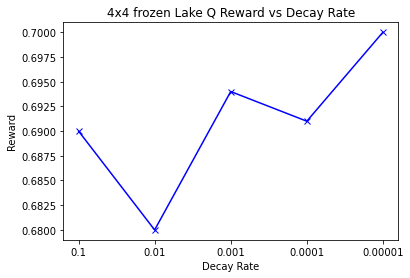

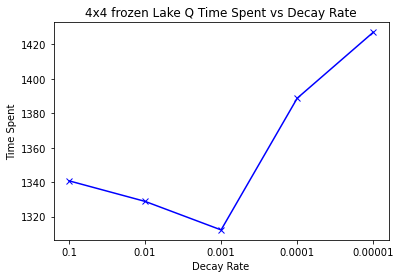

[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3], [0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0], [0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 1, 2, 2], [0, 0, 0, 0, 3, 1, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3], [0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 2, 2, 1, 2, 1, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 2, 1, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1], [0, 0, 3, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 1, 2, 1, 3, 0, 0, 3, 1, 2, 1], [0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 2, 1, 3, 1, 0, 1], [0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 1, 1, 1, 2, 

In [643]:
env = gym.make("FrozenLake-v0")
env.reset()
env.render()
lake_q_decay_plot (env,0.01,0.99,1,
                   0.01,["0.1","0.01","0.001","0.0001","0.00001"])